### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [3]:
# load the data set ans show the first five transaction
df = pd.read_excel('https://github.com/ihavenonamesad/Supermarket_Dec2017_Dataset/raw/refs/heads/main/Supermarket-December-2017.xlsx')

df.head(5)

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [6]:
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,NO_ORD,SLD_AK,SLD_AKG,QTY,...,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,FILLER,SUPPLIER,DEP_SWA,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,0.0,11769.000000,9350.000000,148486.000000,...,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,1.484860e+05,7264.000000,1668.000000,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,NaN,20.819228,15.819209,3.163174,...,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,1.717615e+11,313.185573,1.182854,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,70.033381,54.576439,16.266576,...,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,-12.000000,-12.000000,1.000000,...,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.701010e+11,0.000000,1.000000,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,NaN,0.000000,0.000000,1.000000,...,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,1.701077e+11,8.000000,1.000000,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,NaN,3.000000,2.000000,1.000000,...,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,1.701160e+11,69.000000,1.000000,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,NaN,13.000000,11.000000,2.000000,...,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,1.701251e+11,444.000000,1.000000,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,NaN,2663.000000,1748.000000,2000.000000,...,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,7.013157e+11,1769.000000,2.000000,0.0


In [10]:
# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64
KD_SBR       0.002020
TP_TRN       0.002020
KDSUP       72.501667
KAS          8.212730
TRN_DK       0.002020
              ...    
TP_ADJ       6.339190
USER         0.002020
TANGGAL      0.002020
JAM          0.002020
LAMA_CRD    99.975082
Length: 61, dtype: float64


In [20]:
df_dropped = df.dropna()
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   KD_SBR      0 non-null      object        
 1   TP_TRN      0 non-null      object        
 2   KDSUP       0 non-null      float64       
 3   KAS         0 non-null      float64       
 4   TRN_DK      0 non-null      object        
 5   GDG         0 non-null      object        
 6   GGD         0 non-null      object        
 7   KDSLS       0 non-null      float64       
 8   KEL         0 non-null      object        
 9   ITEM        0 non-null      float64       
 10  NAMA        0 non-null      object        
 11  BIN         0 non-null      float64       
 12  KDBIN       0 non-null      float64       
 13  TGL_TRANS   0 non-null      datetime64[ns]
 14  NO_BKT      0 non-null      object        
 15  NO_ORD      0 non-null      float64       
 16  STS_BYR     0 non-null      object    

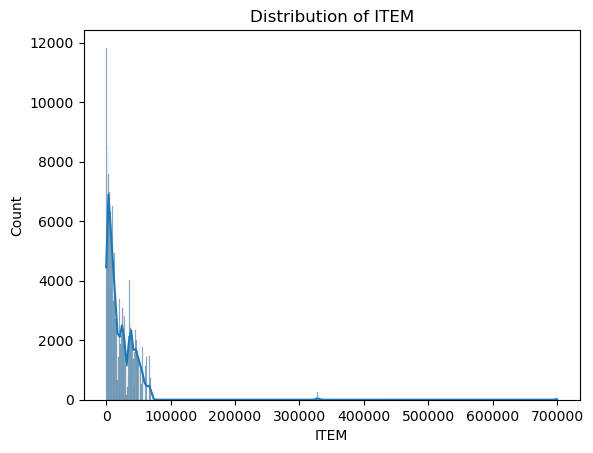

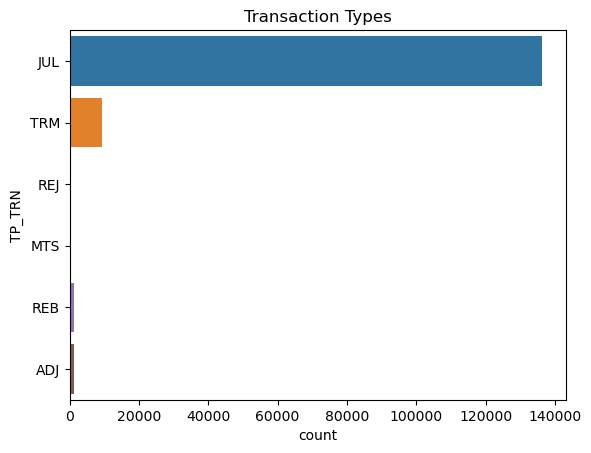

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical columns (example: 'ITEM')
sns.histplot(df['ITEM'], kde=True)
plt.title('Distribution of ITEM')
plt.show()

# Count of categorical values (example: 'TP_TRN')
sns.countplot(y=df['TP_TRN'])
plt.title('Transaction Types')
plt.show()

Sunday       27022
Tuesday      26447
Monday       24201
Wednesday    19323
Friday       18108
Saturday     17557
Thursday     15828
Name: DayName, dtype: int64


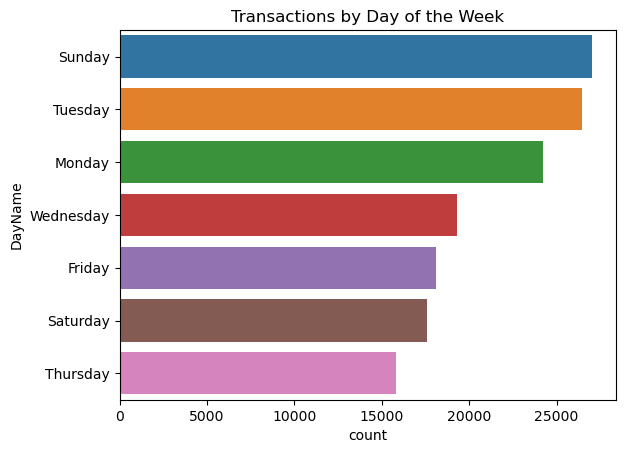

In [19]:
# Convert TANGGAL to datetime
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], errors='coerce')

# Extract additional time features
df['Day'] = df['TANGGAL'].dt.day
df['Month'] = df['TANGGAL'].dt.month
df['DayName'] = df['TANGGAL'].dt.day_name()

# Analyze daily transaction counts
daily_transactions = df['DayName'].value_counts()
print(daily_transactions)

# Plot daily transaction counts
sns.countplot(y=df['DayName'], order=daily_transactions.index)
plt.title('Transactions by Day of the Week')
plt.show()

In [22]:
df_new= df[['NO_BKT','KEL']]
df_new.head()

,NO_BKT,KEL
0,060102001,KERTAS
1,060102002,BTL/DOT
2,060102003,MUSTIKA
3,060102003,SABUN.C
4,060102003,LULURMD


In [23]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Extends the product data (various, not "ITEM") and creates a transaction list
transactions = df_new.groupby(['NO_BKT','KEL'])['KEL'].count().unstack().reset_index().fillna(0).set_index('NO_BKT')
transactions.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
encoded = transactions.applymap(lambda x: 1 if x > 0 else 0)
encoded.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from mlxtend.preprocessing import TransactionEncoder

# Transform transactions into binary form
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)

# Create a DataFrame from the transformation results
df_biner = pd.DataFrame(te_ary, columns=te.columns_)

In [31]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequently purchased items (frequent itemsets)
frequent_itemsets = apriori(encoded, min_support=0.01, use_colnames=True)

# Find association rules based on frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show some of the top rules found
rules = rules.sort_values('lift', ascending=False)
rules.head()

C:\Users\ekasu\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
88,(SABUNCP),(OBATPEL),0.033372,0.029272,0.010386,0.311220,10.632053,0.009409,1.409345,0.937221
89,(OBATPEL),(SABUNCP),0.029272,0.033372,0.010386,0.354809,10.632053,0.009409,1.498204,0.933263
169,"(SABUN.M, SIKAT G)",(P GIGI),0.014294,0.076227,0.010277,0.718929,9.431403,0.009187,3.286620,0.906935
172,(P GIGI),"(SABUN.M, SIKAT G)",0.076227,0.014294,0.010277,0.134815,9.431403,0.009187,1.139301,0.967739
175,"(SHAMPOO, SIKAT G)",(P GIGI),0.014896,0.076227,0.010277,0.689908,9.050686,0.009141,2.979031,0.902961


In [35]:
from mlxtend.frequent_patterns import apriori, association_rules

# Sort frequent itemsets by support value in descending order
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# Show sorted results
frequent_itemsets_sorted.head(20)

,support,itemsets
68,0.166503,(SUSU KT)
44,0.139718,(PAMPERS)
35,0.091888,(MINUMAN)
55,0.087624,(SABUN.M)
15,0.083607,(DETERJN)
61,0.082595,(SHAMPOO)
34,0.078878,(MIE)
41,0.076227,(P GIGI)
66,0.072975,(SUSU KL)
63,0.068984,(SNACK)


In [38]:
# Filter pairs (2-itemsets)
pairs = frequent_itemsets_sorted['itemsets'].apply(len) == 2
pairs.head(10)

68    False
44    False
35    False
55    False
15    False
61    False
34    False
41    False
66    False
63    False
Name: itemsets, dtype: bool

In [39]:
# Filter Triples (3-itemsets)
pairs = frequent_itemsets_sorted[frequent_itemsets_sorted['itemsets'].apply(len) == 3]
pairs.head(10)

,support,itemsets
159,0.024161,"(SABUN.M, P GIGI, SHAMPOO)"
161,0.010277,"(SHAMPOO, P GIGI, SIKAT G)"
160,0.010277,"(SABUN.M, P GIGI, SIKAT G)"
162,0.010222,"(SABUN.M, PAMPERS, SHAMPOO)"
158,0.010195,"(SABUN.M, PAMPERS, P GIGI)"


In [41]:
# Make the association rules for the frequent item sets
ass_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the Code
ass_rules = rules.sort_values('lift', ascending=False)
ass_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
88,(SABUNCP),(OBATPEL),0.033372,0.029272,0.010386,0.311220,10.632053,0.009409,1.409345,0.937221
89,(OBATPEL),(SABUNCP),0.029272,0.033372,0.010386,0.354809,10.632053,0.009409,1.498204,0.933263
169,"(SABUN.M, SIKAT G)",(P GIGI),0.014294,0.076227,0.010277,0.718929,9.431403,0.009187,3.286620,0.906935
172,(P GIGI),"(SABUN.M, SIKAT G)",0.076227,0.014294,0.010277,0.134815,9.431403,0.009187,1.139301,0.967739
175,"(SHAMPOO, SIKAT G)",(P GIGI),0.014896,0.076227,0.010277,0.689908,9.050686,0.009141,2.979031,0.902961


### Answers from Analysis

Most frequent itemsets are SHAMPOO, SABUN.M, & P GIGI
This trio of shampoo, soap, and toothpaste is the most frequently purchased combination, highlighting a strong association among these hygiene items.

Emerging Insights
- The frequent pairing of shampoo, soap, toothpaste, and baby care products suggests an opportunity to display these items together in the store, making it easier for customers to find related products and promoting bundled purchases.
- The association between detergents and softeners, as well as baby products with soap and toothpaste, indicates potential cross-selling opportunities when placed together.
- The combination of noodles and detergents may reflect budget-conscious or convenience-driven shopping habits. Snacks and biscuits also show consistent demand, supporting the idea of positioning impulse-buy items near checkout areas.

Recommendations
- Group Related Hygiene Products: Display shampoo, soap, and toothpaste together, with baby care products like diapers nearby.
- Consolidate Household Items: Arrange detergents, softeners, and other cleaning products in the same aisle for easier navigation.
- Optimize Impulse Buys: Place snacks and biscuits in high-traffic areas, such as near checkout counters, to boost last-minute purchases.
- Improve Accessibility for Staples: Create a section for frequently purchased staples, such as noodles and milk, to enhance convenience.